<a href="https://colab.research.google.com/github/vvicky30/machine-learning/blob/supervised-ml/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing Needed packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
#downloading dataset
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-01-27 20:02:08--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   420KB/s    in 0.2s    

2020-01-27 20:02:09 (420 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
#Reading the data in
df = pd.read_csv("FuelConsumption.csv")
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
#Lets select some features that we want to use for regression.
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


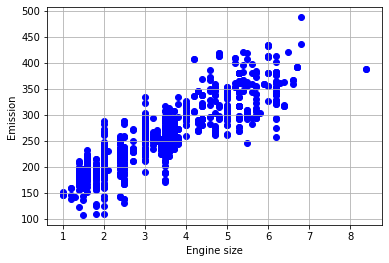

In [7]:
#Lets plot Emission values with respect to Engine size:

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.grid()
plt.show()

In [0]:
#Creating train and test dataset
msk = np.random.rand(len(df)) < 0.8 #random rows are selected upto 80%
train = cdf[msk]#masked rows are used for training
test = cdf[~msk]#unmasked rows are used for testing

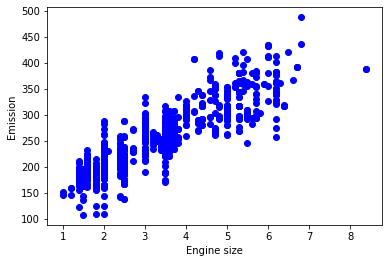

In [9]:
#Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()
#we can observe little-bit less dense scatterplot than the above one

In [10]:
#Multiple Regression Model
"""In reality, there are multiple variables that predict the Co2emission.
When more than one independent variable is present, the process is called multiple linear regression.
For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars.
The good thing here is that Multiple linear regression is the extension of simple linear regression model."""

from sklearn import linear_model
regr = linear_model.LinearRegression()#linearRegression model is being fetched 
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])#here we thake three independent variable in training(features)
y = np.asanyarray(train[['CO2EMISSIONS']])#train_labels
regr.fit (x, y)#fiting training labels & features(three)

# The coefficients
print ('Coefficients: ', regr.coef_)#theta-0 theta-1 theta-2

#here AS we can see the value of theta-0 is vry large so the effectiveness of ENGINESIZE feature on prediction will be more 

Coefficients:  [[10.84436935  6.96899605 10.0928764 ]]


In [0]:
"""
Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words,
 it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ( 𝑦̂  ) over all samples in the dataset.
OLS can find the best parameters using of the following methods: - Solving the model parameters analytically using closed-form equations 
- Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)
"""

In [15]:
#predictions:-
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])#y_hat is predicted one
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])#test-features
y = np.asanyarray(test[['CO2EMISSIONS']])#test-actual -ans
print("Residual sum of squares: %.2f"% np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))#supplied with features of test and test-actual-ans

Residual sum of squares: 569.71
Variance score: 0.86


In [16]:
"""
explained variance regression score:
If  𝑦̂   is the estimated target output, y the corresponding (correct) target output, and Var is Variance, 
the square of the standard deviation, then the explained variance is estimated as follow:

𝚎𝚡𝚙𝚕𝚊𝚒𝚗𝚎𝚍𝚅𝚊𝚛𝚒𝚊𝚗𝚌𝚎(𝑦,𝑦̂ )=1−(𝑉𝑎𝑟{𝑦−𝑦̂ }/𝑉𝑎𝑟{𝑦}) 
The best possible score is 1.0, lower values are worse.
"""

'\nexplained variance regression score:\nIf  𝑦̂   is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:\n\n𝚎𝚡𝚙𝚕𝚊𝚒𝚗𝚎𝚍𝚅𝚊𝚛𝚒𝚊𝚗𝚌𝚎(𝑦,𝑦̂ )=1−(𝑉𝑎𝑟{𝑦−𝑦̂ }/𝑉𝑎𝑟{𝑦}) \nThe best possible score is 1.0, lower values are worse.\n'